<a href="https://colab.research.google.com/github/rokokzk87/Education/blob/main/%D0%9A%D0%B5%D0%B9%D1%81_34_%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B0%D1%82%D1%82%D0%B5%D1%81%D1%82%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Предобработка в Knime**

**В рамках выполнения аттестационной работы я выбрал кейс номер 34.**

**При помощи фреймворка Knime, я провёл предобработку данных кейса: объединил все имеющиеся таблицы по ключевым полям индекса, а также провёл обогащение данных кейса ABC-XYZ и RFM анализом**

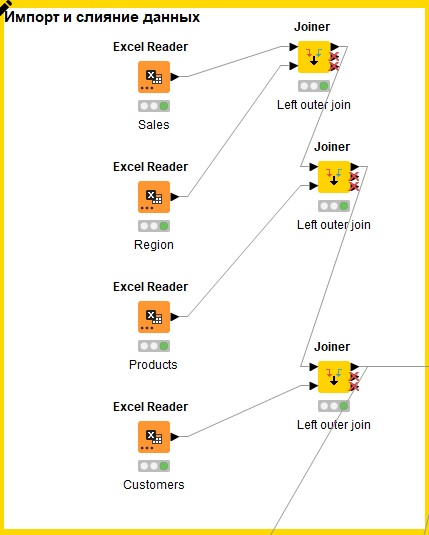

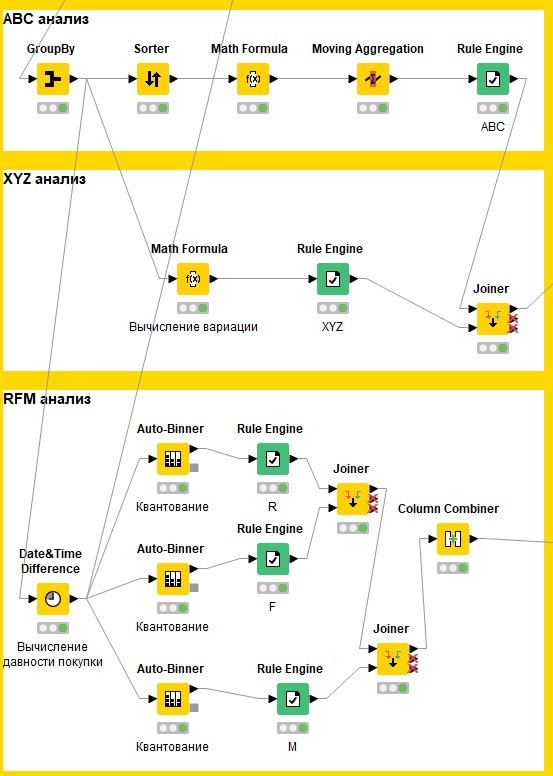

**Затем я добавил параметр оттока клиентов(Churn), которых рассчитывается как YES,если последняя покупка была позднее 7 дней от последней даты всего датасета (01-01-2017)**

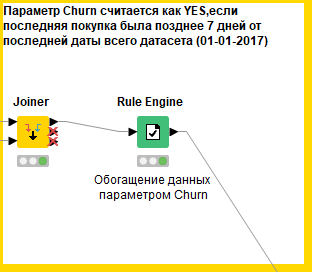

#**EDA**

In [ ]:
#Загрузка подготовленных данных из Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Предварительная загрузка бибилиотеки Pycaret, с помощью которой будем проводить машинное обучение
!pip install pycaret

     |████████████████████████████████| 288 kB 6.9 MB/s 
     |████████████████████████████████| 56 kB 5.4 MB/s 
     |████████████████████████████████| 2.0 MB 49.7 MB/s 
     |████████████████████████████████| 86 kB 5.2 MB/s 
     |████████████████████████████████| 113 kB 75.2 MB/s 
     |████████████████████████████████| 1.3 MB 71.2 MB/s 
     |████████████████████████████████| 1.7 MB 27.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.5 MB 21.1 MB/s 
     |████████████████████████████████| 167 kB 61.9 MB/s 
     |████████████████████████████████| 261 kB 67.0 MB/s 
     |████████████████████████████████| 6.8 MB 29.9 MB/s 
     |████████████████████████████████| 675 kB 69.3 MB/s 
     |████████████████████████████████| 596 kB 64.3 MB/s 
     |████████████████████████████████| 102 kB 15.9 MB/s 
     |█████████████████

In [ ]:
#Импорт модуля решения задач классификации для прогнозирования параметра Churn
from pycaret.classification import *

In [ ]:
#Импорт библиотек для EDA
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
#Загрузка подготовленного датасета
df=pd.read_csv('/content/drive/MyDrive/Самообразование/Аттестация/Case34_ForEDA.csv')
df.head()

,OrderNumber,OrderDate,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Name Index,City,Country,Region Sales,Region Group,Full Name,Product Name,Product Sales,Customer Names,Customer Sales,Churn,ABC-XYZ,RFM
0,SO - 000105,2014-06-01,Wholesale,USD,AXW291,20,7,6,1822.4,10934.4,1476.144,49,Dnepropetrovsk,Ukraine,1831994.4,Lower Regions,"Dnepropetrovsk, Ukraine",Product 7,25715986.9,Bare,2973573.9,NO,BY,422
1,SO - 000120,2014-06-02,Wholesale,USD,AXW291,25,7,8,3095.4,24763.2,1795.332,23,K?ln (Cologne),Germany,2810194.4,Top Regions,"K?ln (Cologne), Germany",Product 7,25715986.9,E. Ltd,3158192.4,YES,BZ,423
2,SO - 000126,2014-06-03,Wholesale,USD,AXW291,20,7,11,174.2,1916.2,95.810,46,Dnepropetrovsk,Ukraine,1831994.4,Lower Regions,"Dnepropetrovsk, Ukraine",Product 7,25715986.9,U.S. Ltd,2938130.9,NO,BZ,522
3,SO - 000153,2014-06-06,Wholesale,USD,AXW291,20,7,11,3926.2,43188.2,3062.436,8,Dnepropetrovsk,Ukraine,1831994.4,Lower Regions,"Dnepropetrovsk, Ukraine",Product 7,25715986.9,Medsep Group,2825812.1,NO,CZ,512
4,SO - 000172,2014-06-09,Wholesale,USD,AXW291,18,7,6,1005.0,6030.0,743.700,6,PRAHA (Prague),Czech Republic,2624209.1,Top Regions,"PRAHA (Prague), Czech Republic",Product 7,25715986.9,"PEDIFIX, Corp",2818200.9,NO,CZ,512


In [ ]:
#Смотрим типы данных и нулевые значения
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OrderNumber                8000 non-null   object 
 1   OrderDate                  8000 non-null   object 
 2   Channel                    8000 non-null   object 
 3   Currency Code              8000 non-null   object 
 4   Warehouse Code             8000 non-null   object 
 5   Delivery Region Index      8000 non-null   int64  
 6   Product Description Index  8000 non-null   int64  
 7   Order Quantity             8000 non-null   int64  
 8   Unit Price                 8000 non-null   float64
 9   Line Total                 8000 non-null   float64
 10  Total Unit Cost            8000 non-null   float64
 11  Customer Name Index        8000 non-null   int64  
 12  City                       8000 non-null   object 
 13  Country                    8000 non-null   objec

In [ ]:
#Нулевых значений нет, а вот параметры RFM и OrderDate содержат некоррктные типы данных. Исправляем.
df['RFM']=df['RFM'].astype('object')
df['OrderDate']=df['OrderDate'].astype('datetime64')
df.dtypes

OrderNumber                          object
OrderDate                    datetime64[ns]
Channel                              object
Currency Code                        object
Warehouse Code                       object
Delivery Region Index                 int64
Product Description Index             int64
Order Quantity                        int64
Unit Price                          float64
Line Total                          float64
Total Unit Cost                     float64
Customer Name Index                   int64
City                                 object
Country                              object
Region Sales                        float64
Region Group                         object
Full Name                            object
Product Name                         object
Product Sales                       float64
Customer Names                       object
Customer Sales                      float64
Churn                                object
ABC-XYZ                         

In [ ]:
#Описательная статистика по качественным показателям датасета
df.describe(include='object')

,OrderNumber,Channel,Currency Code,Warehouse Code,City,Country,Region Group,Full Name,Product Name,Customer Names,Churn,ABC-XYZ,RFM
count,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000
unique,8000,3,1,4,66,26,3,66,14,50,2,4,20
top,SO - 0004824,Wholesale,USD,AXW291,Barcelona,Germany,Top Regions,"Barcelona, Spain",Product 7,Medline,NO,BZ,522
freq,1,4290,8000,3761,155,1498,5405,155,1329,210,5945,4461,1413


In [ ]:
#Описательная статистика по количественным показателям датасета
df.describe(include=['float64','int64'])

,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Name Index,Region Sales,Product Sales,Customer Sales
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8.000000e+03,8.000000e+03,8.000000e+03
mean,33.466250,6.337125,8.457375,2284.278737,19344.528937,1431.662072,25.463125,2.363983e+06,1.835946e+07,3.119921e+06
std,19.041098,4.116533,2.284039,1673.186075,15588.464925,1112.368626,14.413582,2.922742e+05,7.930587e+06,3.441861e+05
min,1.000000,1.000000,5.000000,167.500000,837.500000,68.675000,1.000000,1.831994e+06,2.857289e+06,2.364959e+06
25%,17.000000,2.000000,6.000000,1031.800000,7952.900000,605.797250,13.000000,2.167115e+06,1.177466e+07,2.871252e+06
50%,33.000000,7.000000,8.000000,1849.200000,13989.600000,1080.576000,25.000000,2.373837e+06,2.062181e+07,3.039904e+06
75%,50.000000,10.250000,10.000000,3611.300000,27438.175000,2040.099750,38.000000,2.546831e+06,2.557155e+07,3.288018e+06
max,66.000000,14.000000,12.000000,6566.000000,78711.600000,5498.556000,50.000000,3.244314e+06,2.571599e+07,4.081486e+06


In [ ]:
#Описательная статистика по показателям, содержащим даты
df.describe(include=['datetime64'])

,OrderDate
count,8000
unique,946
top,2014-08-05 00:00:00
freq,21
first,2014-06-01 00:00:00
last,2017-01-01 00:00:00


In [ ]:
#Устанавливаем библиотеку Pandas Profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     |████████████████████████████████| 25.9 MB 1.3 MB/s 
     |████████████████████████████████| 306 kB 7.6 MB/s 
     |████████████████████████████████| 4.7 MB 78.3 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=b7213d321211533e11d8c03a001be0d93a3167464cd4a8dc21d1f05c28e49f5c
  Stored in directory: /tmp/pip-ephem-wheel-cache-9y7ozbdb/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
Successfully built pandas-profiling
  Attempting uninstall: tangled-up-in-unicode
    Found existing installation: tangled-up-in-unicode 0.1.0
    Uninstalling tangled-up-in-unicode-0.1.0:
      Successfully uninstalled tangled-up-in-unicode-0.1.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 3.1.0
    Uninstalling pandas-profi

In [ ]:
#Выводим краткий отчёт по всем показателям
from pandas_profiling import ProfileReport
profile=ProfileReport(df, title="Pandas Profiling Report", minimal = True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Отчет предупреждает, что параметр Currency Code имеет постоянное значение "USD"; параметры OrderNumber, Customer Names, OrderDate, City, Full Name имеют большое количество уникальных значений. Эти параметры будем исключать из обучающей модели**


In [ ]:
#уберём из датасета показатели индексов для корректного отображения визуализаций, связанных с числовыми показателями
df2 = df.drop(['Delivery Region Index','Product Description Index','Customer Name Index'], axis=1)
df2

,OrderNumber,OrderDate,Channel,Currency Code,Warehouse Code,Order Quantity,Unit Price,Line Total,Total Unit Cost,City,Country,Region Sales,Region Group,Full Name,Product Name,Product Sales,Customer Names,Customer Sales,Churn,ABC-XYZ,RFM
0,SO - 000105,2014-06-01,Wholesale,USD,AXW291,6,1822.4,10934.4,1476.144,Dnepropetrovsk,Ukraine,1831994.4,Lower Regions,"Dnepropetrovsk, Ukraine",Product 7,25715986.9,Bare,2973573.9,NO,BY,422
1,SO - 000120,2014-06-02,Wholesale,USD,AXW291,8,3095.4,24763.2,1795.332,K?ln (Cologne),Germany,2810194.4,Top Regions,"K?ln (Cologne), Germany",Product 7,25715986.9,E. Ltd,3158192.4,YES,BZ,423
2,SO - 000126,2014-06-03,Wholesale,USD,AXW291,11,174.2,1916.2,95.810,Dnepropetrovsk,Ukraine,1831994.4,Lower Regions,"Dnepropetrovsk, Ukraine",Product 7,25715986.9,U.S. Ltd,2938130.9,NO,BZ,522
3,SO - 000153,2014-06-06,Wholesale,USD,AXW291,11,3926.2,43188.2,3062.436,Dnepropetrovsk,Ukraine,1831994.4,Lower Regions,"Dnepropetrovsk, Ukraine",Product 7,25715986.9,Medsep Group,2825812.1,NO,CZ,512
4,SO - 000172,2014-06-09,Wholesale,USD,AXW291,6,1005.0,6030.0,743.700,PRAHA (Prague),Czech Republic,2624209.1,Top Regions,"PRAHA (Prague), Czech Republic",Product 7,25715986.9,"PEDIFIX, Corp",2818200.9,NO,CZ,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,SO - 0007921,2016-12-10,Export,USD,FLR025,7,6050.1,42350.7,3509.058,Sheffield,UK,2262657.0,Top Regions,"Sheffield, UK",Product 2,22913892.8,Burt's Corp,2956435.3,NO,BZ,522
7996,SO - 0007924,2016-12-11,Export,USD,FLR025,10,268.0,2680.0,217.080,Hannover,Germany,2232051.4,Mid Regions,"Hannover, Germany",Product 1,25571548.3,Victory Ltd,3407814.3,NO,BZ,534
7997,SO - 0007931,2016-12-13,Export,USD,FLR025,12,951.4,11416.8,694.522,Hannover,Germany,2232051.4,Mid Regions,"Hannover, Germany",Product 1,25571548.3,Qualitest,3002497.8,NO,BZ,522
7998,SO - 0008040,2016-12-25,Export,USD,FLR025,10,837.5,8375.0,335.000,Duisburg,Germany,2689721.7,Top Regions,"Duisburg, Germany",Product 7,25715986.9,"3LAB, Ltd",2756440.3,NO,CZ,512


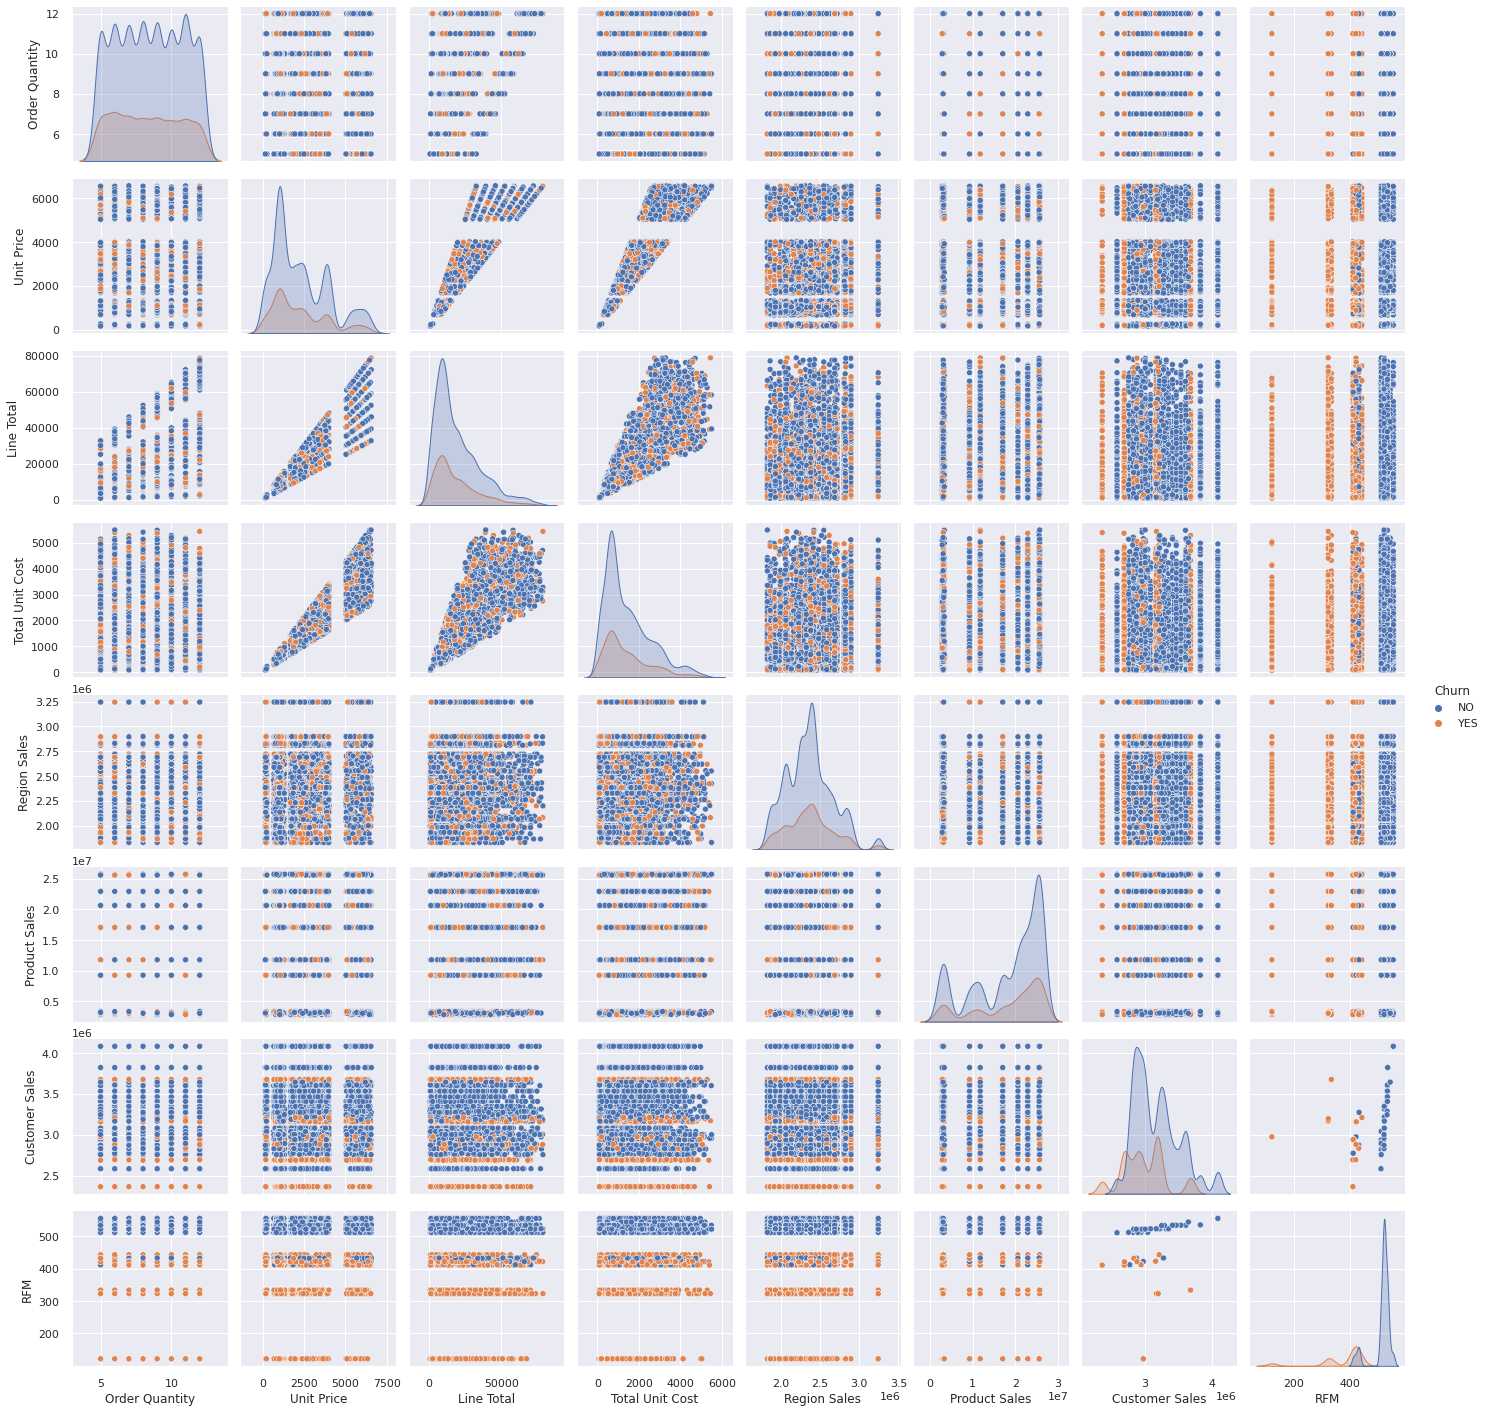

In [ ]:
#Посторим перекрёстные точечные графики по числовым показателям,где цвет точек будет показывать отток клиентов (Сhurn)
sns.pairplot(df2, hue="Churn")

**Можно заметить, что показатели RFM и Customer Sales связаны функциональной зависимостью с показателем Churn. Эти показатели также надо будет исключить, для того чтобы модель не оказалась "переобученной"**

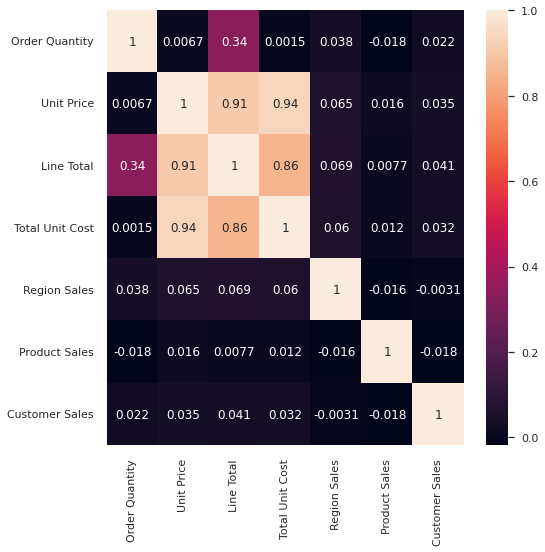

In [ ]:
#Построим тепловую карту по коэффициенту корреляции Пирсона
plt.figure(figsize = (8,8))
sns.heatmap(df2.corr(),annot = True)

**Показатели Line Total, Unit Price и  Total Unit Cost имеют высокий уровень корреляции. Для улучшения качества модели, исключим показатель Line Total**

In [ ]:
#Исключаем лишние показатели на основании проведенного EDA
df3=df2.drop(['OrderNumber','OrderDate','City','Full Name','Currency Code','Customer Names','Customer Sales','RFM','Line Total'],axis=1)
df3

,Channel,Warehouse Code,Order Quantity,Unit Price,Total Unit Cost,Country,Region Sales,Region Group,Product Name,Product Sales,Churn,ABC-XYZ
0,Wholesale,AXW291,6,1822.4,1476.144,Ukraine,1831994.4,Lower Regions,Product 7,25715986.9,NO,BY
1,Wholesale,AXW291,8,3095.4,1795.332,Germany,2810194.4,Top Regions,Product 7,25715986.9,YES,BZ
2,Wholesale,AXW291,11,174.2,95.810,Ukraine,1831994.4,Lower Regions,Product 7,25715986.9,NO,BZ
3,Wholesale,AXW291,11,3926.2,3062.436,Ukraine,1831994.4,Lower Regions,Product 7,25715986.9,NO,CZ
4,Wholesale,AXW291,6,1005.0,743.700,Czech Republic,2624209.1,Top Regions,Product 7,25715986.9,NO,CZ
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,Export,FLR025,7,6050.1,3509.058,UK,2262657.0,Top Regions,Product 2,22913892.8,NO,BZ
7996,Export,FLR025,10,268.0,217.080,Germany,2232051.4,Mid Regions,Product 1,25571548.3,NO,BZ
7997,Export,FLR025,12,951.4,694.522,Germany,2232051.4,Mid Regions,Product 1,25571548.3,NO,BZ
7998,Export,FLR025,10,837.5,335.000,Germany,2689721.7,Top Regions,Product 7,25715986.9,NO,CZ


#**Машинное обучение Pycaret**




In [ ]:
#Разделим датасет на тренировочное и "невидимое" для обучения множества
df_train = df3.sample(frac=0.95, random_state=786)
df_unseen = df3.drop(df_train.index)
df_train.reset_index(inplace=True, drop=True)
df_unseen.reset_index(inplace=True, drop=True)

In [ ]:
df_train.shape

(7600, 12)

In [ ]:
df_unseen.shape

(400, 12)

In [ ]:
#Настроим модель обучения. Задаем категориальные признаки, а также  делаем балансировку предсказываемого показателя Churn 
krv =setup(df_train, target = 'Churn', 
            silent=True,
            categorical_features=['Channel','Warehouse Code','Country','Region Group','Product Name','ABC-XYZ'],
          fix_imbalance=True,
            session_id=543)

,Description,Value
0,session_id,543
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"NO: 0, YES: 1"
4,Original Data,"(7600, 12)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
#Сравниваем модели по метрике Accuracy
best_model = compare_models(exclude=['dummy'],sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7342,0.6370,0.0719,0.3768,0.1198,0.0423,0.0631,1.596
ada,Ada Boost Classifier,0.7257,0.6514,0.1505,0.4057,0.2140,0.0895,0.1078,0.484
lightgbm,Light Gradient Boosting Machine,0.7251,0.6226,0.1231,0.3739,0.1846,0.0677,0.0831,0.373
rf,Random Forest Classifier,0.7201,0.6180,0.1326,0.3559,0.1924,0.0656,0.0769,1.198
et,Extra Trees Classifier,0.7039,0.6072,0.1845,0.3436,0.2392,0.0764,0.0821,1.237
dt,Decision Tree Classifier,0.6338,0.5315,0.3239,0.2961,0.3092,0.0608,0.0610,0.124
lda,Linear Discriminant Analysis,0.6135,0.6447,0.5574,0.3398,0.4220,0.1565,0.1677,0.146
ridge,Ridge Classifier,0.6133,0.0000,0.5560,0.3395,0.4213,0.1556,0.1667,0.073
knn,K Neighbors Classifier,0.5527,0.4785,0.3261,0.2300,0.2693,-0.0389,-0.0402,0.216
svm,SVM - Linear Kernel,0.4509,0.0000,0.6000,0.1523,0.2429,0.0000,0.0000,0.270


In [ ]:
#Создаем модель Gradient Boosting Classifier	
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7256,0.6396,0.0667,0.3103,0.1098,0.0220,0.0312
1,0.7368,0.6525,0.0444,0.3529,0.0789,0.0235,0.0414
2,0.7312,0.6375,0.0444,0.3000,0.0774,0.0128,0.0210
3,0.7274,0.6032,0.0593,0.3077,0.0994,0.0190,0.0281
4,0.7481,0.6371,0.1185,0.5161,0.1928,0.1083,0.1500
5,0.7162,0.5958,0.0889,0.3000,0.1371,0.0239,0.0303
6,0.7350,0.6864,0.0889,0.4000,0.1455,0.0586,0.0822
7,0.7500,0.6449,0.0815,0.5500,0.1419,0.0818,0.1345
8,0.7274,0.6166,0.0444,0.2727,0.0764,0.0057,0.0091
9,0.7439,0.6561,0.0821,0.4583,0.1392,0.0678,0.1032


In [ ]:
#Настраиваем гиперпараметры модели 
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7331,0.6444,0.1333,0.4186,0.2022,0.0908,0.1123
1,0.7124,0.6035,0.1333,0.3333,0.1905,0.0532,0.0615
2,0.7274,0.6264,0.0889,0.3529,0.1420,0.0444,0.0596
3,0.7256,0.5969,0.0889,0.3429,0.1412,0.0410,0.0543
4,0.7331,0.6284,0.1111,0.4054,0.1744,0.0732,0.0953
5,0.7105,0.5981,0.1481,0.3390,0.2062,0.0613,0.0692
6,0.7293,0.6596,0.1259,0.3953,0.1910,0.0780,0.0965
7,0.7425,0.6342,0.1481,0.4762,0.2260,0.1200,0.1496
8,0.7218,0.6205,0.0815,0.3143,0.1294,0.0278,0.0369
9,0.7401,0.6476,0.1269,0.4474,0.1977,0.0970,0.1246


In [ ]:
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=9,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.5, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=9,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=543, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


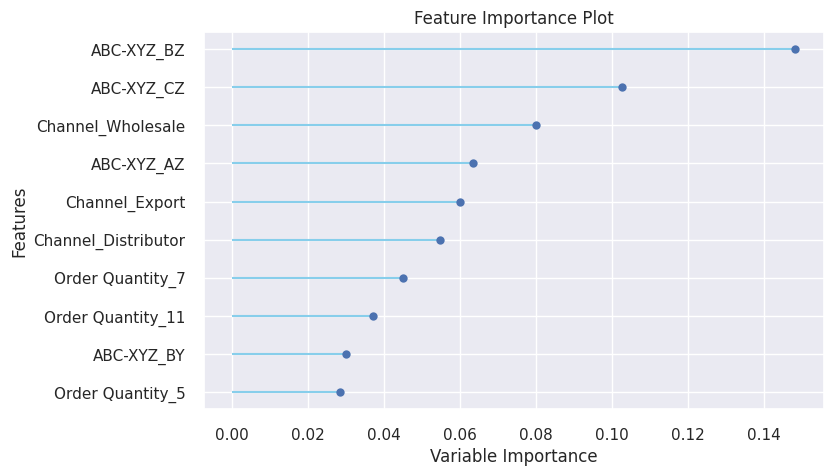

In [ ]:
#График значимости показателей модели показывает, что показатели ABC-XYZ анализа и канала продаж являются наиболее значимыми для точности выявления оттока клиентов
plot_model(tuned_gbc, plot='feature')

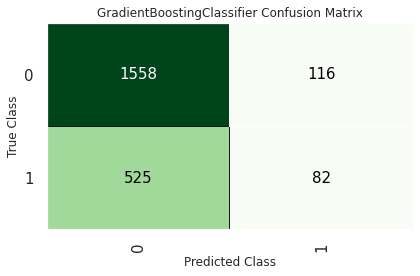

In [ ]:
#Матрица ошибок для модели
plot_model(tuned_gbc, plot = 'confusion_matrix')

In [ ]:
#Предсказываем показатель Churn
predict_model(tuned_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.719,0.6359,0.1351,0.4141,0.2037,0.0838,0.1033


,Unit Price,Total Unit Cost,Region Sales,Product Sales,Channel_Distributor,Channel_Export,Channel_Wholesale,Warehouse Code_AXW291,Warehouse Code_FLR025,Warehouse Code_GUT930,Warehouse Code_NXH382,Order Quantity_10,Order Quantity_11,Order Quantity_12,Order Quantity_5,Order Quantity_6,Order Quantity_7,Order Quantity_8,Order Quantity_9,Country_Austria,Country_Belarus,Country_Bosnia,Country_Bulgaria,Country_Croatia,Country_Czech Republic,Country_Denmark,Country_Finland,Country_France,Country_Germany,Country_Greece,Country_Hungary,Country_Italy,Country_Latvia,Country_Lithuania,Country_Moldova,Country_Netherlands,Country_Norway,Country_Poland,Country_Portugal,Country_Romania,Country_Serbia,Country_Spain,Country_Sweden,Country_UK,Country_Ukraine,Region Group_Lower Regions,Region Group_Mid Regions,Region Group_Top Regions,Product Name_Product 1,Product Name_Product 10,Product Name_Product 11,Product Name_Product 12,Product Name_Product 13,Product Name_Product 14,Product Name_Product 2,Product Name_Product 3,Product Name_Product 4,Product Name_Product 5,Product Name_Product 6,Product Name_Product 7,Product Name_Product 8,Product Name_Product 9,ABC-XYZ_AZ,ABC-XYZ_BY,ABC-XYZ_BZ,ABC-XYZ_CZ,Churn,Label,Score
0,1922.900024,788.388977,2521933.500,25571548.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NO,NO,0.8019
1,857.599976,548.864014,2096657.750,25715986.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NO,NO,0.7871
2,971.500000,806.344971,2431798.500,22913892.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NO,NO,0.7231
3,2251.199951,1148.112061,1983019.125,25571548.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,YES,NO,0.7367
4,6157.299805,4556.401855,2046508.250,17047098.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NO,NO,0.7928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2276,1139.000000,968.150024,2384416.000,22913892.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NO,NO,0.6946
2277,2318.199951,1947.287964,2074668.375,22913892.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NO,NO,0.7359
2278,1996.599976,938.401978,2000854.500,25571548.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NO,NO,0.6696
2279,1165.800049,524.6

In [ ]:
#"Финализируем" модель
final_gbc = finalize_model(tuned_gbc)

In [ ]:
#Гиперпараметры окончательной модели
print(final_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=9,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.5, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=9,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=543, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
#Предсказываем показатель Churn на финальной моделм
predict_model(final_gbc);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7532,0.7241,0.1763,0.6294,0.2754,0.1799,0.2333


In [ ]:
#Делаем предсказание на 5% данных, не участвовавших в машинном обучении
unseen_predictions = predict_model(final_gbc, data=df_unseen)
unseen_predictions.head(20)

,Channel,Warehouse Code,Order Quantity,Unit Price,Total Unit Cost,Country,Region Sales,Region Group,Product Name,Product Sales,Churn,ABC-XYZ,Label,Score
0,Wholesale,AXW291,11,2224.4,1579.324,Ukraine,1831994.4,Lower Regions,Product 7,25715986.9,YES,CZ,NO,0.6199
1,Wholesale,AXW291,9,984.9,669.732,Serbia,2252627.1,Top Regions,Product 7,25715986.9,YES,BZ,NO,0.6572
2,Wholesale,AXW291,8,1105.5,652.245,Ukraine,1831994.4,Lower Regions,Product 7,25715986.9,NO,BZ,NO,0.6465
3,Wholesale,AXW291,8,1139.0,740.350,Latvia,2720360.8,Top Regions,Product 7,25715986.9,NO,BZ,NO,0.7256
4,Wholesale,AXW291,8,3839.1,2034.723,Czech Republic,2624209.1,Top Regions,Product 7,25715986.9,NO,AZ,NO,0.8772
5,Wholesale,AXW291,10,3865.9,1816.973,Croatia,2388744.3,Top Regions,Product 7,25715986.9,NO,BZ,NO,0.7907
6,Wholesale,AXW291,5,917.9,514.024,Spain,3244314.2,Top Regions,Product 7,25715986.9,NO,BZ,YES,0.5851
7,Wholesale,AXW291,11,2633.1,2238.135,Ukraine,1831994.4,Lower Regions,Product 7,25715986.9,NO,CZ,NO,0.6209
8,Wholesale,AXW291,11,1212.7,715.493,Ukraine,2701319.4,Top Regions,Product 7,25715986.9,NO,BZ,NO,0.8015
9,Wholesale,AXW291,8,1132.3,702.026,Hungary,2046508.3,Mid Regions,Product 7,25715986.9,YES,CZ,NO,0.5844


In [ ]:
#Смотрим точность наших предсказаний по метрике Accuracy
from pycaret.utils import check_metric
check_metric(actual=unseen_predictions['Churn'],prediction=unseen_predictions['Label'],metric='Accuracy')

0.7425

#**Сравнение с моделью машинного обучения, выполненной в Knime**

**Машинное обучение в фреймворке Knime было выполнено по тому же сценарию с учётом ребалансировки предсказываемого параметра Churn методом SMOTE**


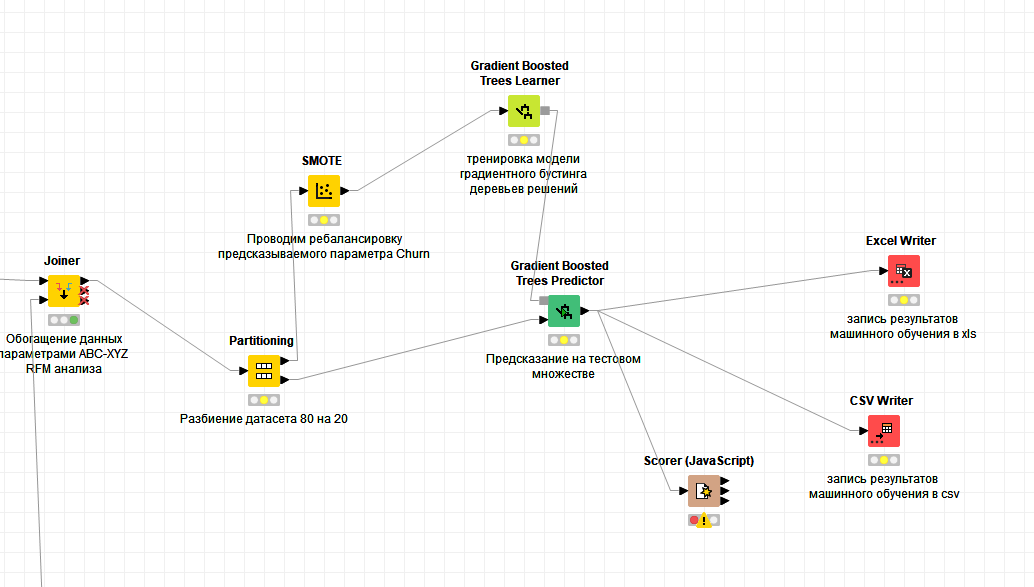

**Итоговые показатели метрики Accuracy практически один в один совпадают с результатами в Pycaret.**

**Тем не менее, для получения сопоставимых метрик в Knime пришлось отказаться от нормализации числовых параметров для обучаемого множества.**

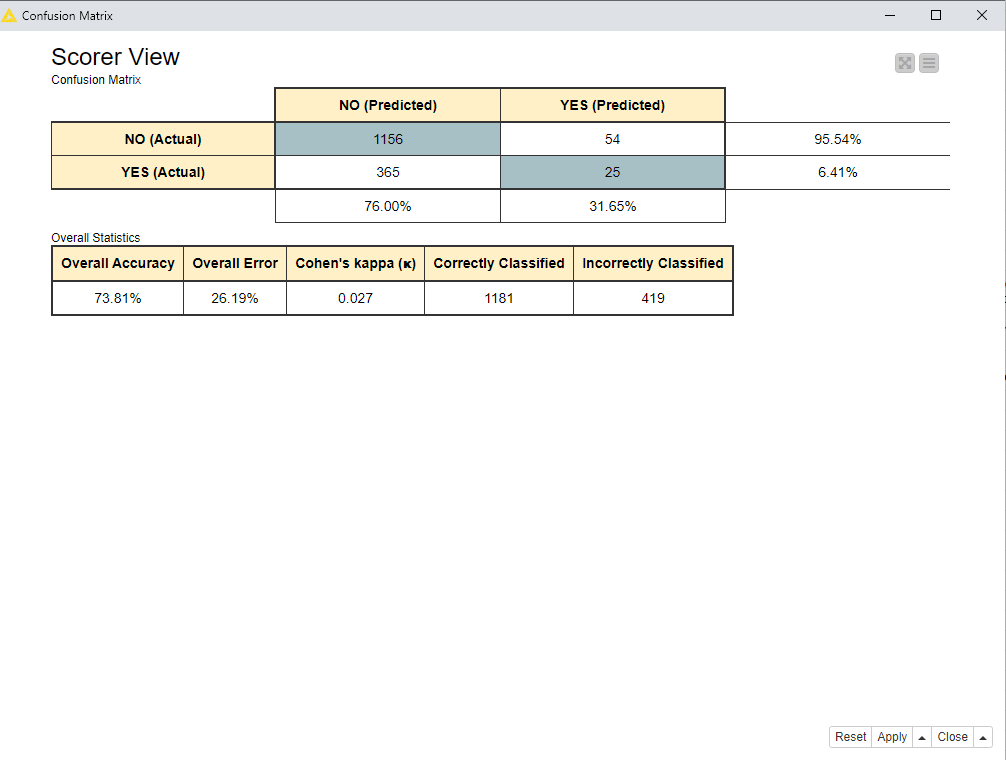

#**Загрузка в BigQuery**

In [ ]:
#Для начала обогащаем данными с предсказаниями весь изначальный датасет
whole_prediction = predict_model(final_gbc, data=df)
whole_prediction.to_excel('case34pycaret.xls',index=False)
whole_prediction.head(20)

,OrderNumber,OrderDate,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Name Index,City,Country,Region Sales,Region Group,Full Name,Product Name,Product Sales,Customer Names,Customer Sales,Churn,ABC-XYZ,RFM,Label,Score
0,SO - 000105,2014-06-01,Wholesale,USD,AXW291,20,7,6,1822.4,10934.4,1476.144,49,Dnepropetrovsk,Ukraine,1831994.4,Lower Regions,"Dnepropetrovsk, Ukraine",Product 7,25715986.9,Bare,2973573.9,NO,BY,422,NO,0.9244
1,SO - 000120,2014-06-02,Wholesale,USD,AXW291,25,7,8,3095.4,24763.2,1795.332,23,K?ln (Cologne),Germany,2810194.4,Top Regions,"K?ln (Cologne), Germany",Product 7,25715986.9,E. Ltd,3158192.4,YES,BZ,423,NO,0.6934
2,SO - 000126,2014-06-03,Wholesale,USD,AXW291,20,7,11,174.2,1916.2,95.810,46,Dnepropetrovsk,Ukraine,1831994.4,Lower Regions,"Dnepropetrovsk, Ukraine",Product 7,25715986.9,U.S. Ltd,2938130.9,NO,BZ,522,NO,0.8005
3,SO - 000153,2014-06-06,Wholesale,USD,AXW291,20,7,11,3926.2,43188.2,3062.436,8,Dnepropetrovsk,Ukraine,1831994.4,Lower Regions,"Dnepropetrovsk, Ukraine",Product 7,25715986.9,Medsep Group,2825812.1,NO,CZ,512,NO,0.6209
4,SO - 000172,2014-06-09,Wholesale,USD,AXW291,18,7,6,1005.0,6030.0,743.700,6,PRAHA (Prague),Czech Republic,2624209.1,Top Regions,"PRAHA (Prague), Czech Republic",Product 7,25715986.9,"PEDIFIX, Corp",2818200.9,NO,CZ,512,YES,0.6261
5,SO - 000175,2014-06-10,Wholesale,USD,AXW291,20,7,11,2224.4,24468.4,1579.324,1,Dnepropetrovsk,Ukraine,1831994.4,Lower Regions,"Dnepropetrovsk, Ukraine",Product 7,25715986.9,Avon Corp,2694766.8,YES,CZ,421,NO,0.6199
6,SO - 000192,2014-06-12,Wholesale,USD,AXW291,31,7,8,1152.4,9219.2,622.296,24,RIGA,Latvia,2720360.8,Top Regions,"RIGA, Latvia",Product 7,25715986.9,Burt's Corp,2956435.3,NO,BZ,522,NO,0.7256
7,SO - 000193,2014-06-12,Wholesale,USD,AXW291,24,7,5,1085.4,5427.0,922.590,25,Odessa,Ukraine,2619123.8,Top Regions,"Odessa, Ukraine",Product 7,25715986.9,Prasco Group,3215933.0,NO,BZ,523,NO,0.7075
8,SO - 000194,2014-06-13,Wholesale,USD,AXW291,27,7,5,5031.7,25158.5,4025.360,11,ZAGREB,Croatia,2388744.3,Top Regions,"ZAGREB, Croatia",Product 7,25715986.9,Apollo Ltd,3600358.9,NO,AZ,534,NO,0.8769
9,SO - 000195,2014-06-13,Wholesale,USD,AXW291,18,7,8,1092.1,8736.8,436.840,17,PRAHA (Prague),Czech Republic,2624209.1,Top Regions,"PRAHA (Prague), Czech Republic",Product 7,25715986.9,Pure Group,3821592.9,NO,AZ,535,NO,0.8982


In [ ]:
#К сожалению, названия колонок с пробелами и дефисами не подойдут для загрузки в BigQuery. Приходится делать замену значений.
whole_prediction.columns=whole_prediction.columns.str.replace(' ', '_')
whole_prediction.columns=whole_prediction.columns.str.replace('-', '_')

In [ ]:
whole_prediction.columns


Index(['OrderNumber', 'OrderDate', 'Channel', 'Currency_Code',
       'Warehouse_Code', 'Delivery_Region_Index', 'Product_Description_Index',
       'Order_Quantity', 'Unit_Price', 'Line_Total', 'Total_Unit_Cost',
       'Customer_Name_Index', 'City', 'Country', 'Region_Sales',
       'Region_Group', 'Full_Name', 'Product_Name', 'Product_Sales',
       'Customer_Names', 'Customer_Sales', 'Churn', 'ABC_XYZ', 'RFM', 'Label',
       'Score'],
      dtype='object')

In [ ]:
#Загружаем полностью обогащенный датасет в BigQuery для дальнейшей работы
BqDatasetwithtable='FinalExam.Case34'
BqProject='krv-big-query'
whole_prediction.to_gbq(BqDatasetwithtable, BqProject, chunksize=10000, if_exists='append' )

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=e1rd8RaWlHWjRVQnN8SlkYgBVDijIg&prompt=consent&access_type=offline
Enter the authorization code: 4/1AX4XfWi8PmVor7KKC4SpHBa3w3ypdEabNX805qcpgNKegWV03k3vZcIK_vE


1it [00:05,  5.03s/it]


# **Визуальная аналитика Power BI**

In [ ]:
%%html
<iframe width="1400" height="800" src="https://app.powerbi.com/view?r=eyJrIjoiMGRmYjAxNTAtNmM4Ni00OTU4LTlkYjItMzVlMWZhMzAzNjY1IiwidCI6ImM4YzY5YWFlLTMyYmEtNDNkMS05ZjU5LWY5OGM5NWZiMjI3YiIsImMiOjl9" frameborder="0" allowFullScreen="true"></iframe>


**Мы провели визуальную аналитику с элементами машинного обучения в системе Power BI.**

**На титульном листе формулами DAX созданы основные KPI по продажам. Следует обратить внимание на стабильно высокие показатели продаж, прибыли и маржи за 4 года.**

**Анализируя продуктовый ассортимент в разрезе объёмов продаж/маржинальности, можно визуально выделить на графике scatter plot 3 сегмента:**

1.   Низкие продажи - низкая маржа (Product 3,6,12,13)
2.   Высокие продажи - средняя маржа (Product 1,2,5,7,11)
3.   Низкие продажи - высокая маржа (Product 4,9,10,14)





**Интересные инсайты сделаны при анализе ключевых факторов, влияющих на показатель оттока клиентов. Power BI, используя внутренние алгоритмы машинного обучения, установил что покупатели, относящиеся к категории CZ, вносят наибольший вклад в показатель оттока.**

**Также на показатель оттока увеличивается, если покупатель из Австрии и кол-во сделанных заказаов по клиенту меньше 6**

**Сравнивая с машинным обучением, проведённым в Pycaret, стоит отметить, что в обоих случаях параметры ABC-XYZ анализа являются ключевыми для определения оттока клиентов.**

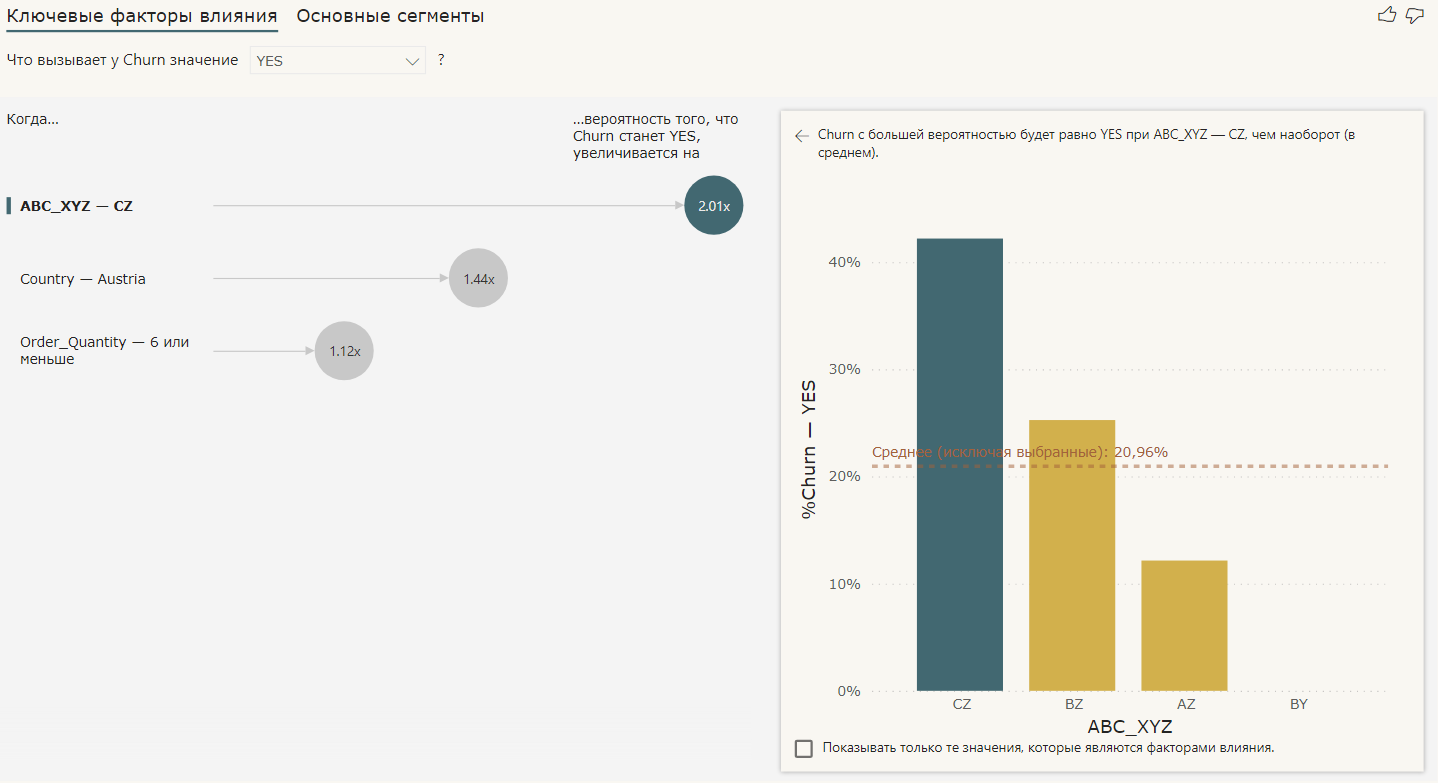

**Мы также проанализировали при помощи дерева декомпозиции, кто внёс наибольший вклад в показатель прибыли по ключевым факторам ABC-XYZ, Country и OrderQuantity.**

**Выяснилось, что наибольшая прибыль была по клиентам категории BZ из Германии сделавших 12 заказов.**

**Наименьший вклад в общую прибыль сделали клиенты ктегории BY из Хорватии, сделавшие 9 заказов.**


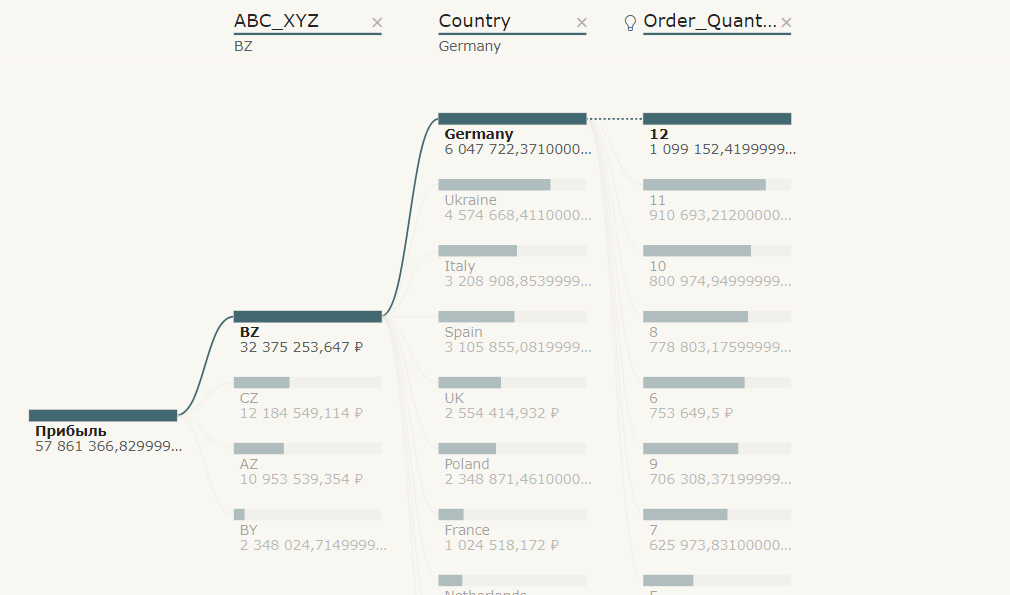

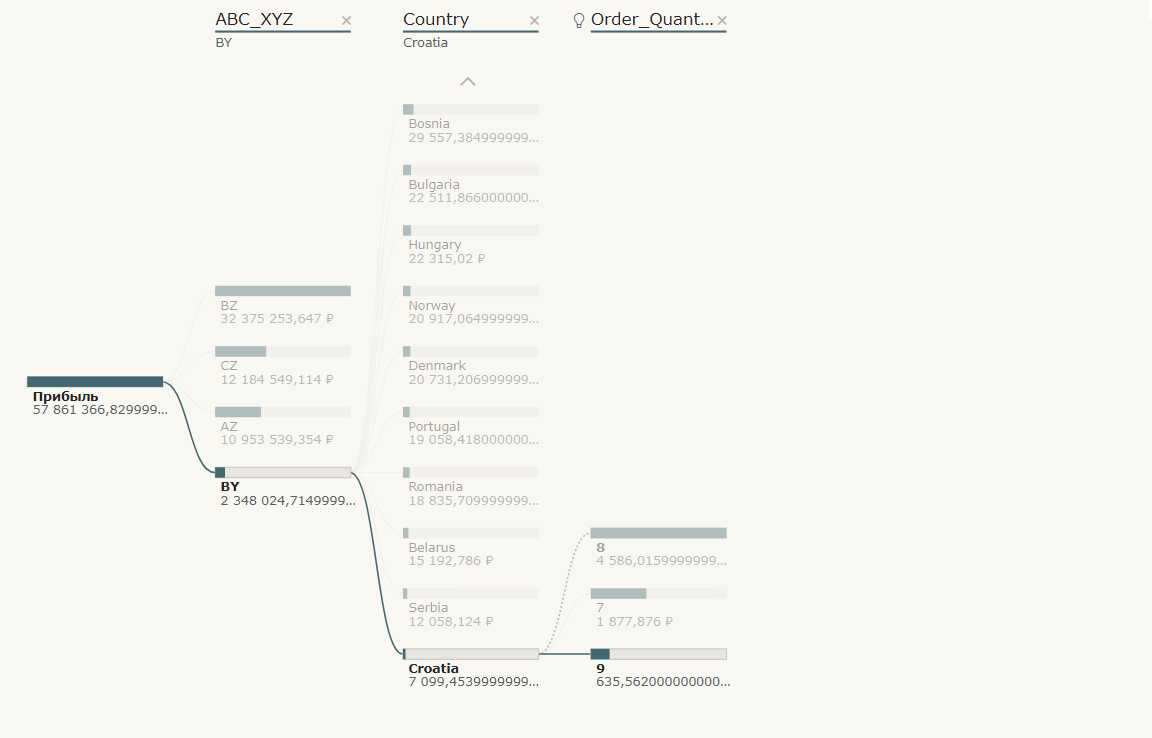

**Данные инсайты были сохранены в закладках отчета PowerBI**

#**Визуальная аналитика Tableau**

In [ ]:
%%html
<div class='tableauPlaceholder' id='viz1638277022064' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;st&#47;story1_16382740387250&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='story1_16382740387250&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;st&#47;story1_16382740387250&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1638277022064');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='777px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**В системе Tableau мы провели дополнительную аналитику, связанную с географией продаж по странам**

**Так например, видно, что медиана продаж по Германии выше, чем по остальным странам. Встроенный в Tableau  метод машинного обучения (кластеризация),выполненный по показателям маржинальности и продаж, помог разделить географию продаж на 5 кластеров:**


1.   Кластер 1 - низкие продажи, средняя маржа (Финляндия, Голландия, Швеция, Латвия, Румыния, Венгрия, Автрия, Хорватия)
2.   Кластер 2 - низкие продажи, высокая маржа (Белоруссия, Литва, Дания, Чехия, Болгария, Сербия, Босния, Греция)
3.   Кластер 3 - Высокие продажи, средняя маржа (Германия, Украина)
4.   Кластер 4 - Низкие продажи, Низкая маржа (Норвегия, Португалия, Молдова)
5.   Кластер 5 - Средние продажи, средняя маржа (Испания, Англия, Италия, Польша)

**Такой анализ позволит проводить различную региональную стратегию по продажам.**

#**Машинное обучение Big Query**

**Создадим модель машинного обучения непосредственно в службе BigQuery.**

**Из датасета выберем те же параметры, что мы выбирали в обучении Pycaret, также сделаем балансировку параметра Churn**

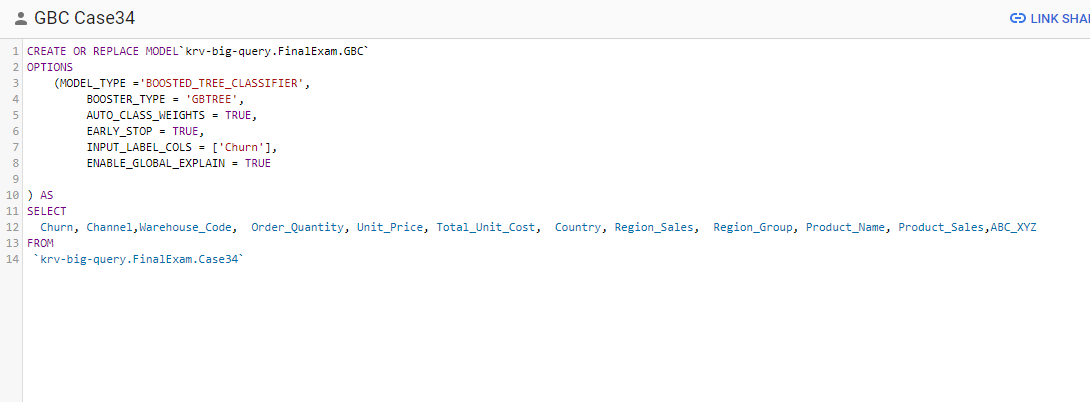

**Полученная модель имеет метрики немного хуже, чем у моделей ,построенных в Pycaret и Knime.**



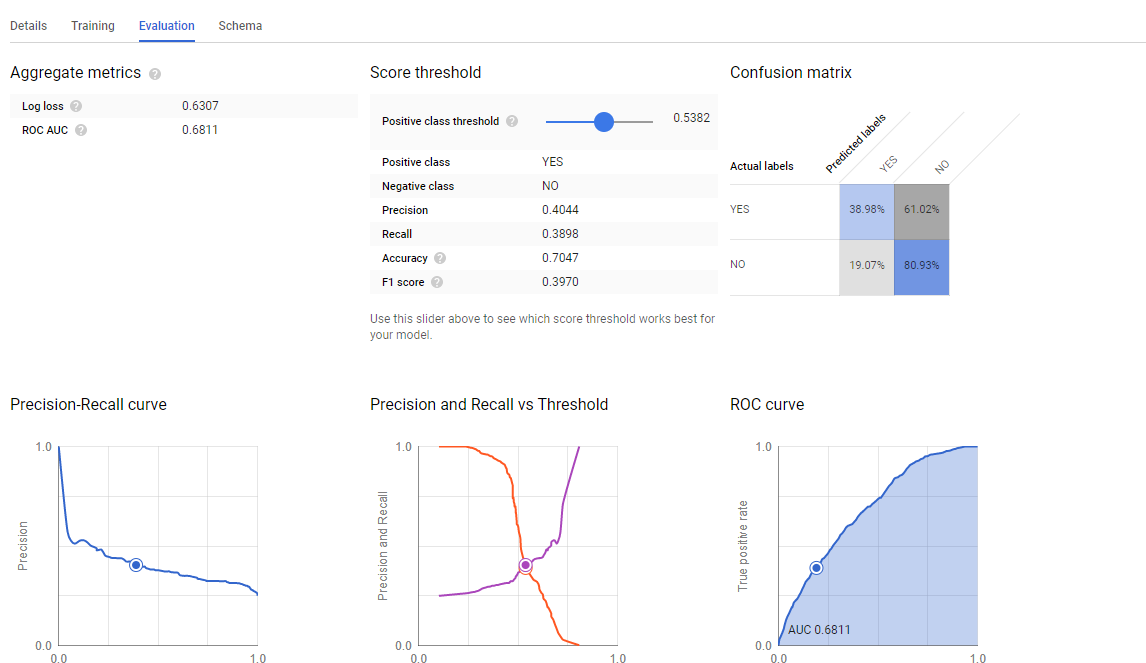

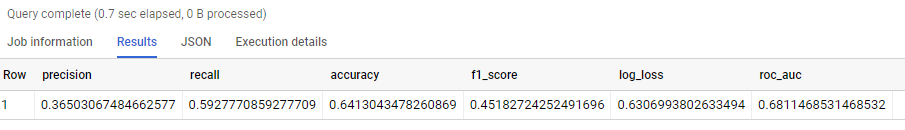

**Тем не менее, в качестве основного параметра, влияющего на предсказание оттока клиентов, модель, как и остальные, выбрала параметр ABC-XYZ**

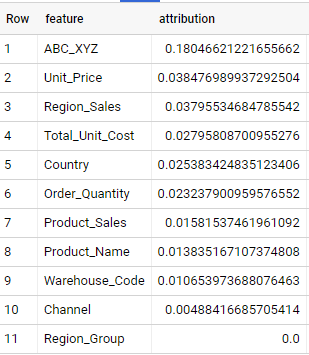

#**Итоги проделанной работы**#

**Таким образом, в ходе данной работы был проведён датасета, связанного с продажам продуктов, дпри помощи возможностей различных платформ. В целях ETL и обогащения данных были использованы Knime, что позволило быстро соединить  данные, обогатить ABC-XYZ и RFM анализом и подготовить к машинному обучению.**

> **EDA**


**EDA и описательная статистика осуществялась с использованием библиотек Python - Pandas, Matplotlib, Numpy, Seaborn и PandasProfiling. Были выявлены общие распределения, количественные и частотные характеристики данных. Важной задачей на этапе EDA являлось определение корреляции между количественными признаками и отбор параметров для машинного обучения**

> **Машинное обучение**

**В ходе машинного обучения решалась задача определения оттока клиентов (Churn),что сводилось к бинарной классификации на несбалансированных классах. Библиотека PyCaret позволила построить и оценить результаты сразу нескольких моделей и затем осуществить перекрестную проверку и тюнинг лучших из них. В итоге, машинное обучение осуществлялось при помощи модели градиентного бустинга. В ходя исследования было также проведено AutoML в платформе Knime,а также обучение в BigQuery** 

**Итоговые метрики оказались примерно идентичными (за исключением BigQuery), однако наиболее значимыми показателями во всех случаях оказались - отнесение к группе ABCXYZ.**


> **Визуальная аналитика Power BI и Tableau**

**Визуальная аналитика позволяет выявить и наглядно представить ключевые результаты, закономерности и тренды. Встроенный в Tableau метод машинного обучения (кластеризация),выполненный по показателям маржинальности и продаж, помог разделить географию продаж на 5 кластеров.**

**В Power BI рассмотрены возможности расширенной аналитики: проведен анализ ключевых факторов, влияющих на показатель оттока клиентов, а также построено дерево декомпозиции, кто внёс наибольший вклад в показатель прибыли по ключевым факторам ABC-XYZ, Country и OrderQuantity. Данные инсайты были сохранены в закладках отчета PowerBI.**

